In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('../Data/immunization_kenya_2022.csv')
data.head()

,county,indicator,Unit,Date,Value
0,Nairobi,BCG vaccination received,NaN,1989,44.4
1,Nairobi,BCG vaccination received,NaN,1993,100.0
2,Nairobi,BCG vaccination received,NaN,1998,97.7
3,Nairobi,BCG vaccination received,NaN,2003,97.6
4,Nairobi,BCG vaccination received,NaN,2008,93.8


In [7]:
data.columns

Index(['county', 'indicator', 'Unit', 'Date', 'Value'], dtype='object')

In [8]:
data.describe()

,Unit,Date,Value
count,0.0,1567.000000,1567.000000
mean,NaN,2017.932993,82.559349
std,NaN,5.710891,29.656624
min,NaN,1989.000000,0.000000
25%,NaN,2014.000000,78.650000
50%,NaN,2022.000000,92.900000
75%,NaN,2022.000000,97.800000
max,NaN,2022.000000,417.000000


In [9]:
data.info

<bound method DataFrame.info of        county                                          indicator  Unit  Date  \
0     Nairobi                           BCG vaccination received   NaN  1989   
1     Nairobi                           BCG vaccination received   NaN  1993   
2     Nairobi                           BCG vaccination received   NaN  1998   
3     Nairobi                           BCG vaccination received   NaN  2003   
4     Nairobi                           BCG vaccination received   NaN  2008   
...       ...                                                ...   ...   ...   
1562   Vihiga                   Hepatitis 2 vaccination received   NaN  2022   
1563   Vihiga                   Hepatitis 3 vaccination received   NaN  2022   
1564   Vihiga  Haemophilus influenza type b 1 vaccination rec...   NaN  2022   
1565   Vihiga  Haemophilus influenza type b 2 vaccination rec...   NaN  2022   
1566   Vihiga  Haemophilus influenza type b 3 vaccination rec...   NaN  2022   

      V

In [10]:
# drop 'Unit' column 
data.drop(columns='Unit', inplace=True)

In [11]:
data.head()

,county,indicator,Date,Value
0,Nairobi,BCG vaccination received,1989,44.4
1,Nairobi,BCG vaccination received,1993,100.0
2,Nairobi,BCG vaccination received,1998,97.7
3,Nairobi,BCG vaccination received,2003,97.6
4,Nairobi,BCG vaccination received,2008,93.8


In [ ]:
# Capitalize column names for uniformity
data.columns = ['County', 'Indicator', 'Date', 'Value']
data.head()

,County,Indicator,Date,Value
0,Nairobi,BCG vaccination received,1989,44.4
1,Nairobi,BCG vaccination received,1993,100.0
2,Nairobi,BCG vaccination received,1998,97.7
3,Nairobi,BCG vaccination received,2003,97.6
4,Nairobi,BCG vaccination received,2008,93.8


In [21]:
# check for null
data.isnull().sum()

County       0
Indicator    0
Date         0
Value        0
dtype: int64

In [22]:
# Unique indicators
print("Number of unique indicators:", data['Indicator'].nunique())
print("Sample indicators:\n", data['Indicator'].unique()[:5])

# Unique counties
print("Number of unique counties:", data['County'].nunique())
print("Counties:\n", sorted(data['County'].unique()))

# Date range
print(f"Date range: {data['Date'].min()} to {data['Date'].max()}")


Number of unique indicators: 19
Sample indicators:
 ['BCG vaccination received' 'DPT 1 vaccination received'
 'DPT 2 vaccination received' 'DPT 3 vaccination received'
 'Polio 1 vaccination received']
Number of unique counties: 47
Counties:
 ['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'A", 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka-Nithi', 'Trans-Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir', 'West Pokot']
Date range: 1989 to 2022


### Data visualization
1. National Trend for Each Indicator (Line Plot)

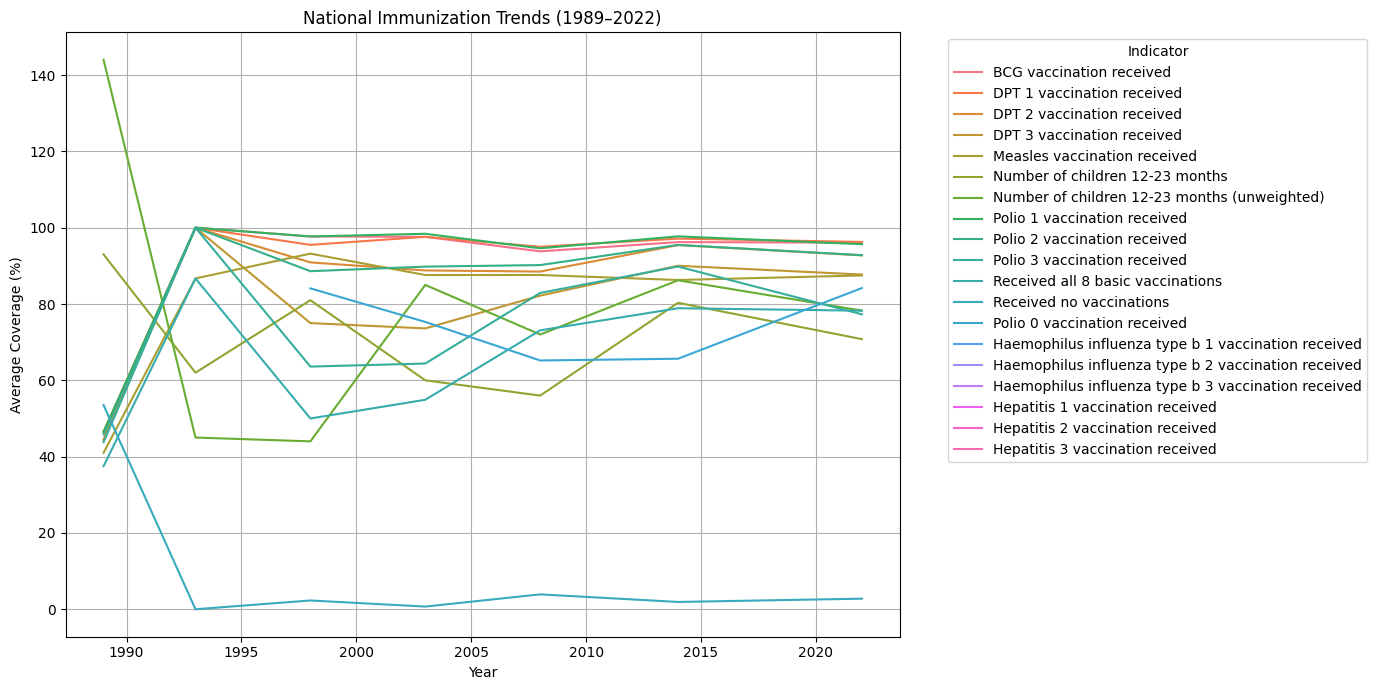

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average value per indicator per year (national level)
trend_all = data.groupby(['Date', 'Indicator'])['Value'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_all, x='Date', y='Value', hue='Indicator')
plt.title('National Immunization Trends (1989–2022)')
plt.xlabel('Year')
plt.ylabel('Average Coverage (%)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Indicator')
plt.tight_layout()
plt.show()


2. Heatmap: Indicator Coverage per County in 2022

/tmp/ipykernel_107109/177733026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_2022, x='Value', y='Indicator', palette='Blues_r')


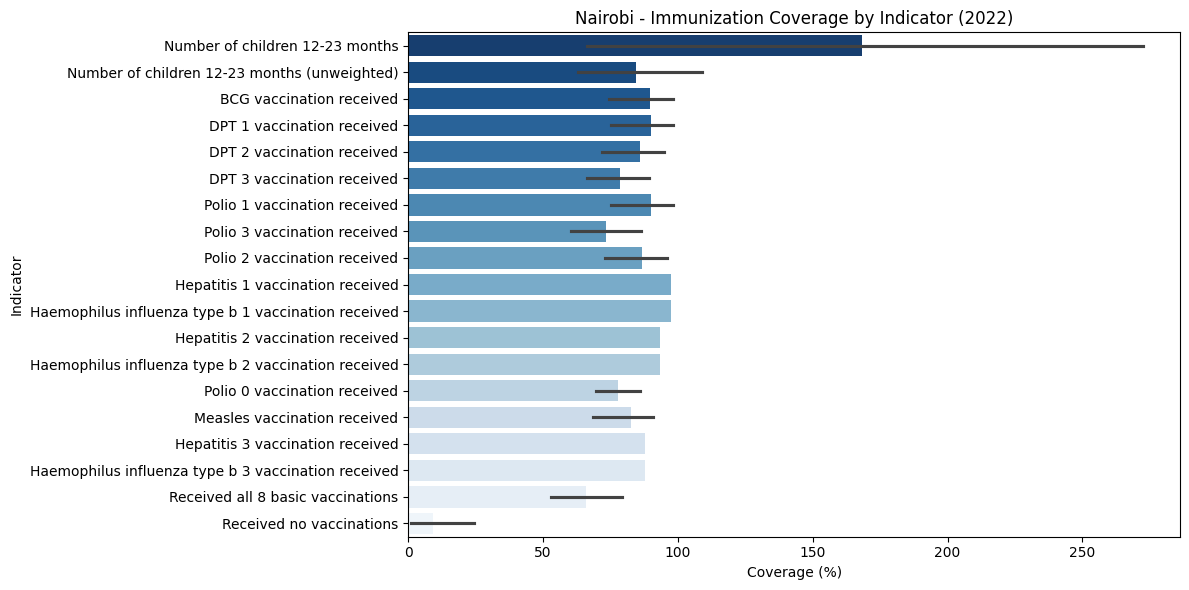

In [ ]:
county_name = 'Nairobi'

county_2022 = data[data['County'] == county_name].sort_values(by='Value', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=county_2022, x='Value', y='Indicator', palette='Blues_r')
plt.title(f'{county_name} - Immunization Coverage by Indicator (2022)')
plt.xlabel('Coverage (%)')
plt.ylabel('Indicator')
plt.tight_layout()
plt.show()


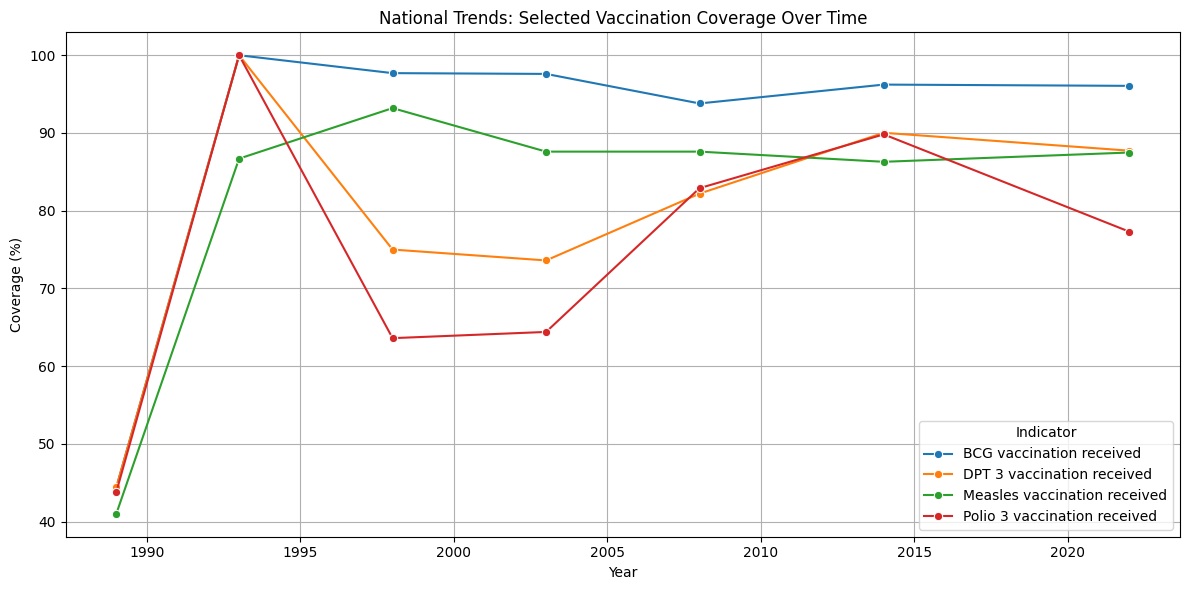

In [ ]:
indicators = ['BCG vaccination received', 'DPT 3 vaccination received', 'Polio 3 vaccination received', 'Measles vaccination received']
subset = data[data['Indicator'].isin(indicators)]

# Group and average by year and indicator
trends = subset.groupby(['Date', 'Indicator'])['Value'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=trends, x='Date', y='Value', hue='Indicator', marker='o')
plt.title('National Trends: Selected Vaccination Coverage Over Time')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.grid(True)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()


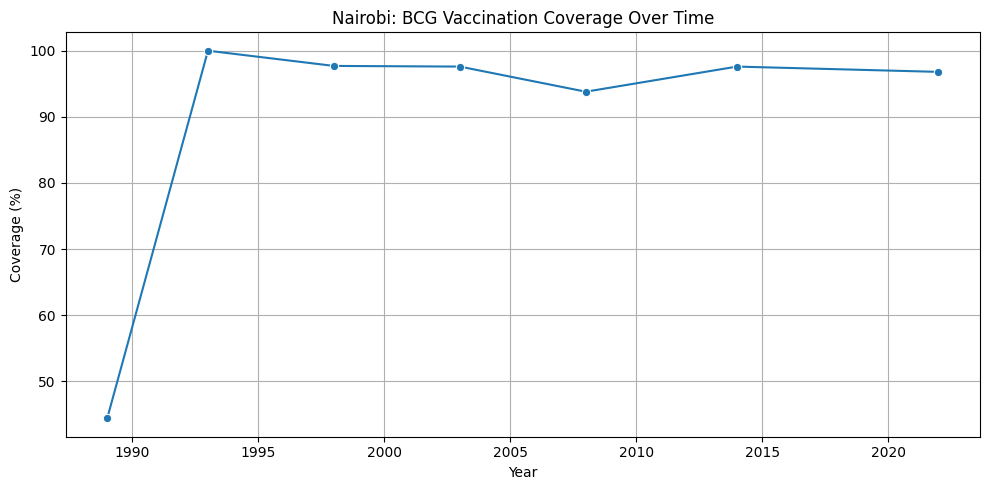

In [29]:
nairobi = data[(data['County'] == 'Nairobi') & (data['Indicator'] == 'BCG vaccination received')]

plt.figure(figsize=(10, 5))
sns.lineplot(data=nairobi, x='Date', y='Value', marker='o')
plt.title('Nairobi: BCG Vaccination Coverage Over Time')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(kenya_map.columns)


Index(['OBJECTID', 'ID_', 'COUNTY_NAM', 'CONST_CODE', 'CONSTITUEN',
       'COUNTY_COD', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [37]:
import geopandas as gpd
import pandas as pd

# Load Kenya counties GeoJSON 
geo_path = "../Data/kenya_counties.geojson"  
kenya_map = gpd.read_file(geo_path)
kenya_map.rename(columns={'COUNTY_NAM': 'County'}, inplace=True)

# Filter for 2022 and a specific indicator
indicator = "BCG vaccination received"
filtered = data[(data["Date"] == 2022) & (data["Indicator"] == indicator)]
filtered = filtered[["County", "Value"]]

# Standardize casing
kenya_map["County"] = kenya_map["County"].str.title()
filtered["County"] = filtered["County"].str.title()

# Merge
map_data = kenya_map.merge(filtered, on="County", how="left")


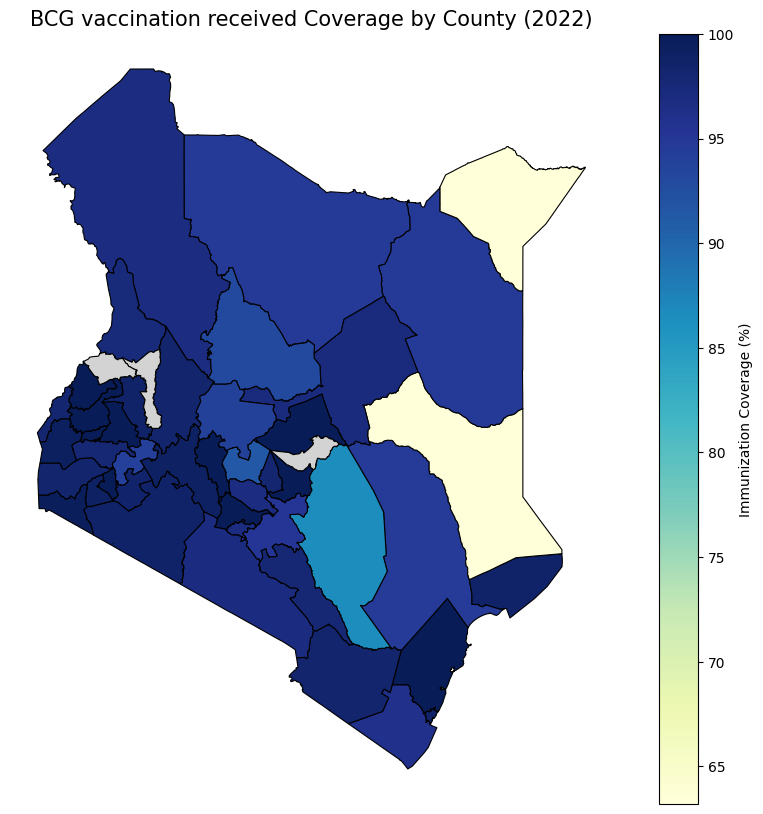

In [38]:
import matplotlib.pyplot as plt

# Set up plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the counties shaded by immunization Value
map_data.plot(column='Value',
              cmap='YlGnBu',
              linewidth=0.8,
              edgecolor='black',
              legend=True,
              legend_kwds={'label': "Immunization Coverage (%)"},
              missing_kwds={'color': 'lightgrey'},
              ax=ax)

# Title and aesthetics
ax.set_title(f"{indicator} Coverage by County (2022)", fontdict={'fontsize': 15})
ax.axis('off')  # Hide axis

plt.show()


County-wise Indicator Comparison (2022)

/tmp/ipykernel_107109/2492890235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, y='County', x='Value', palette='Blues_d')


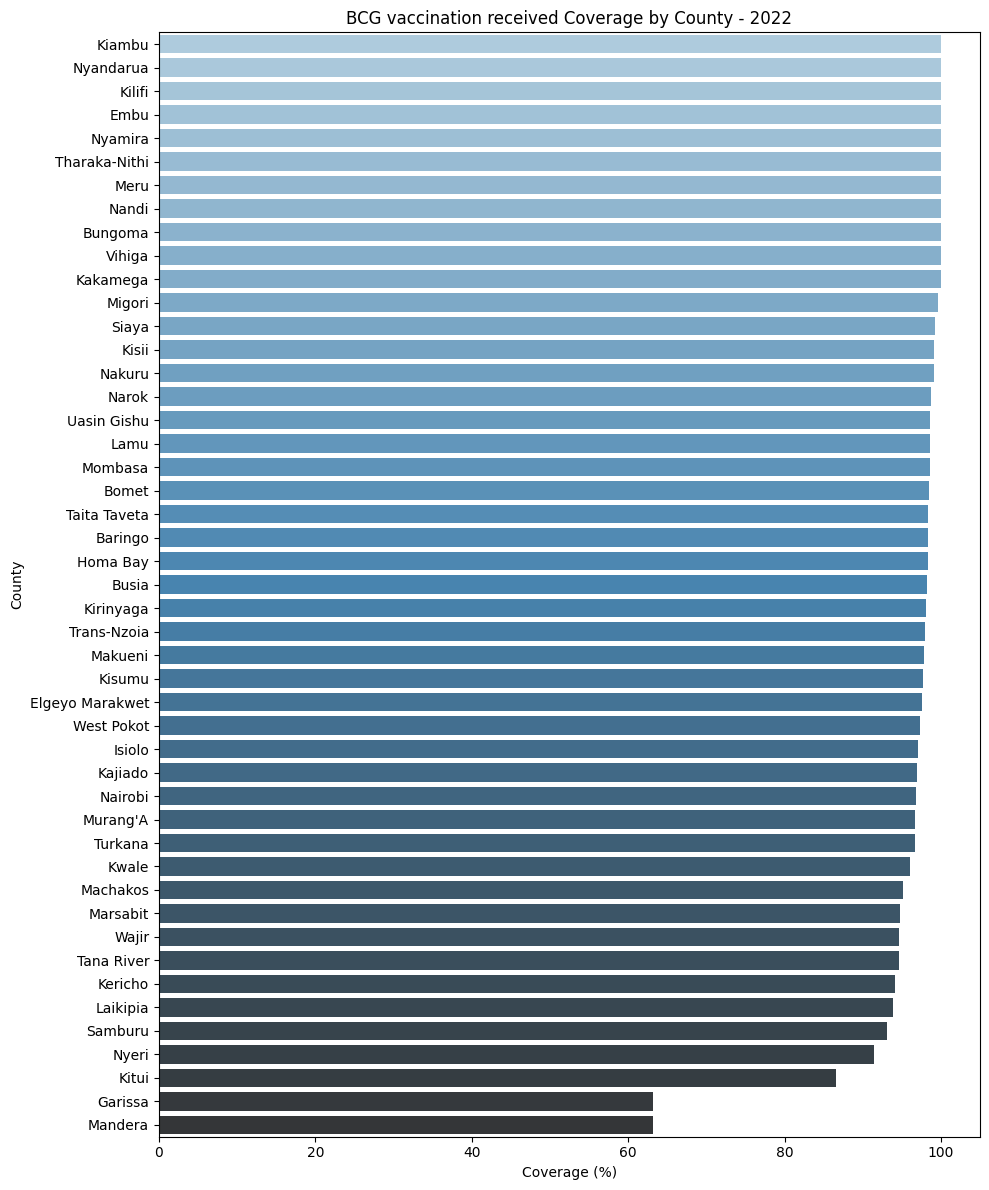

In [39]:
# Sort by coverage
bar_data = filtered.sort_values("Value", ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(data=bar_data, y='County', x='Value', palette='Blues_d')
plt.title(f"{indicator} Coverage by County - 2022")
plt.xlabel("Coverage (%)")
plt.ylabel("County")
plt.tight_layout()
plt.show()


County Vaccination Profile

/tmp/ipykernel_107109/2579876190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_data, x='Value', y='Indicator', palette='viridis')


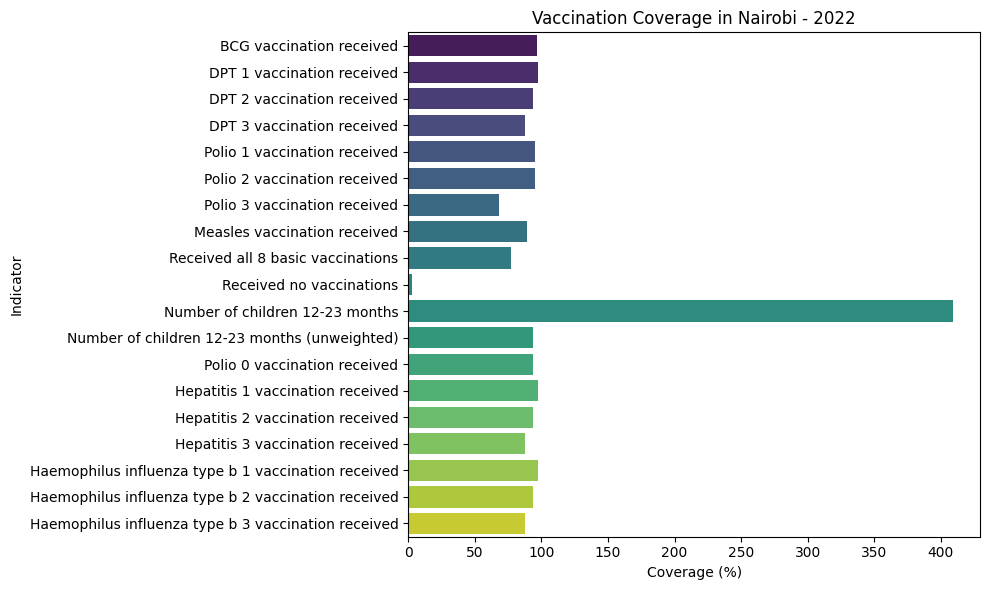

In [40]:
selected_county = "Nairobi"
county_data = data[(data["County"] == selected_county) & (data["Date"] == 2022)]

plt.figure(figsize=(10, 6))
sns.barplot(data=county_data, x='Value', y='Indicator', palette='viridis')
plt.title(f"Vaccination Coverage in {selected_county} - 2022")
plt.xlabel("Coverage (%)")
plt.tight_layout()
plt.show()


Correlation Heatmap Between Indicators

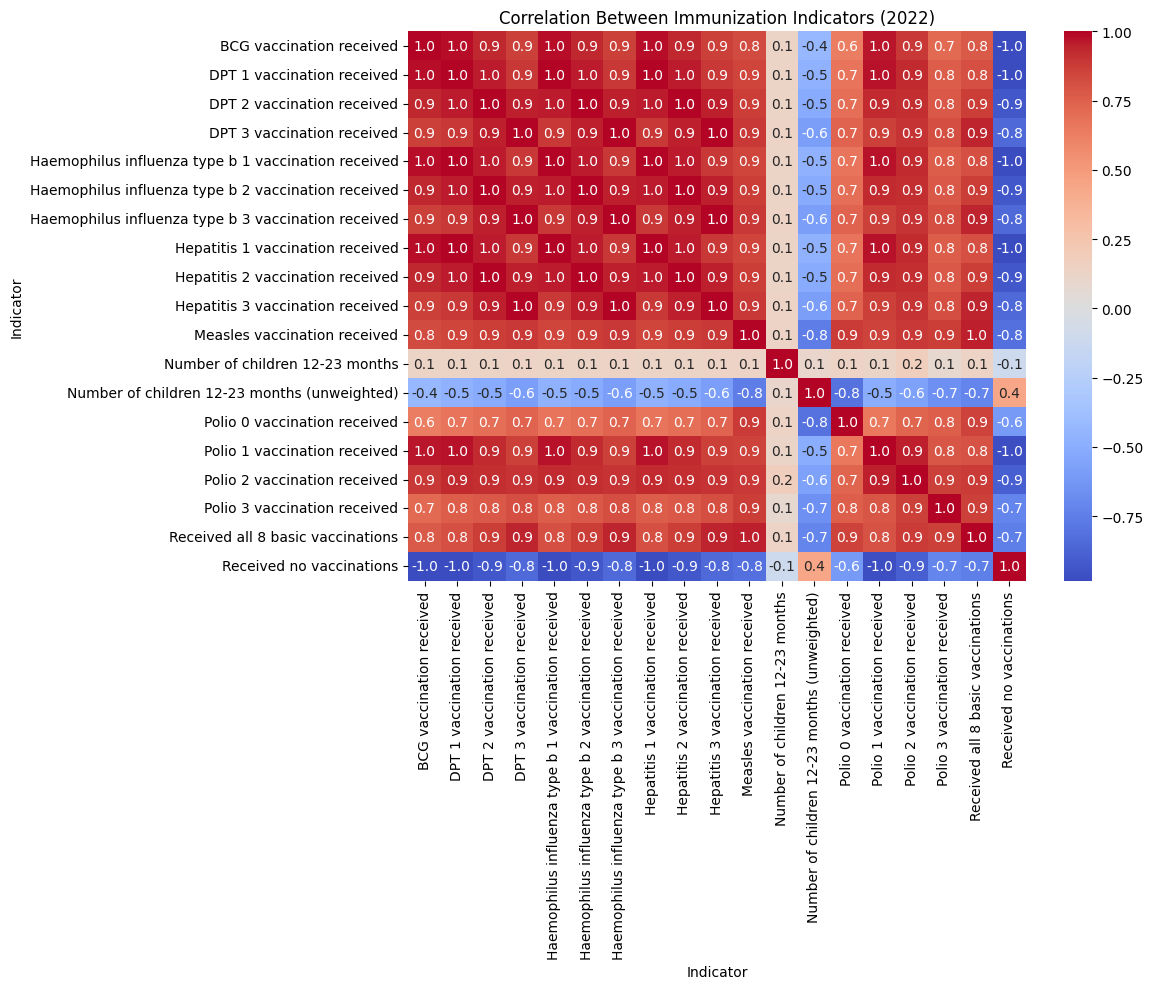

In [41]:
# Pivot data to wide format
pivot = data[data["Date"] == 2022].pivot(index='County', columns='Indicator', values='Value')
corr_matrix = pivot.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Between Immunization Indicators (2022)")
plt.tight_layout()
plt.show()


 Top & Bottom Counties Per Indicator

In [42]:
top_n = data[data["Date"] == 2022].groupby(["Indicator", "County"])["Value"].mean().reset_index()

# Top counties
top = top_n.sort_values(['Indicator', 'Value'], ascending=[True, False]).groupby("Indicator").head(1)

# Bottom counties
bottom = top_n.sort_values(['Indicator', 'Value'], ascending=[True, True]).groupby("Indicator").head(1)

print("Top Counties per Indicator:\n", top)
print("\nBottom Counties per Indicator:\n", bottom)


Top Counties per Indicator:
                                              Indicator         County  Value
2                             BCG vaccination received        Bungoma  100.0
50                          DPT 1 vaccination received          Busia  100.0
97                          DPT 2 vaccination received          Busia  100.0
171                         DPT 3 vaccination received         Nakuru   99.1
191  Haemophilus influenza type b 1 vaccination rec...          Busia  100.0
238  Haemophilus influenza type b 2 vaccination rec...          Busia  100.0
312  Haemophilus influenza type b 3 vaccination rec...         Nakuru   99.1
332                   Hepatitis 1 vaccination received          Busia  100.0
379                   Hepatitis 2 vaccination received          Busia  100.0
453                   Hepatitis 3 vaccination received         Nakuru   99.1
514                       Measles vaccination received         Vihiga  100.0
546                    Number of children 12-23